In [ ]:
import sys
!{sys.executable} -m pip install jaxlib

In [4]:
import jax.numpy as jnp
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pennylane as qml


/Users/1zd/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
params_size = 43
lr = 0.01
seed = 2222
wires = list(range(6))
dev = qml.device("default.qubit", wires=6)
n_epochs = 200
batch_size = 32

In [6]:
digits = load_digits()

Load MNIST dataset with images in 8 X 8 resolution with label, dataset has 1797 samples

In [7]:
X, y = digits.data, digits.target

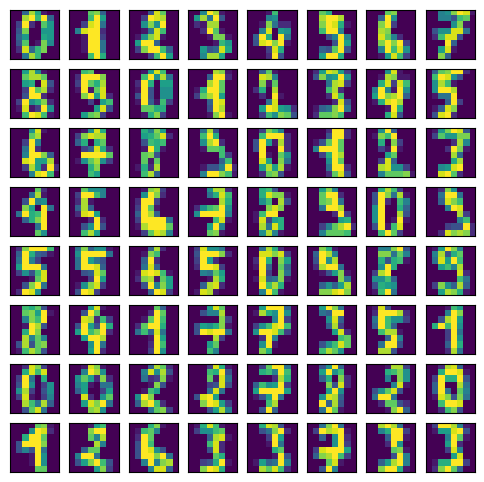

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots(8, 8, figsize=(6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i])#, cmap='binary')
    axi.set(xticks=[], yticks=[])

plt.show()

In [16]:
klass = (0, 1, 2, 3)

We select only those digits in `klass`

In [39]:
mask = np.isin(y, klass)

In [40]:
selected_data = X[mask]
selected_target = y[mask]

In [41]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)

In [42]:
scaled_data.shape

(720, 64)

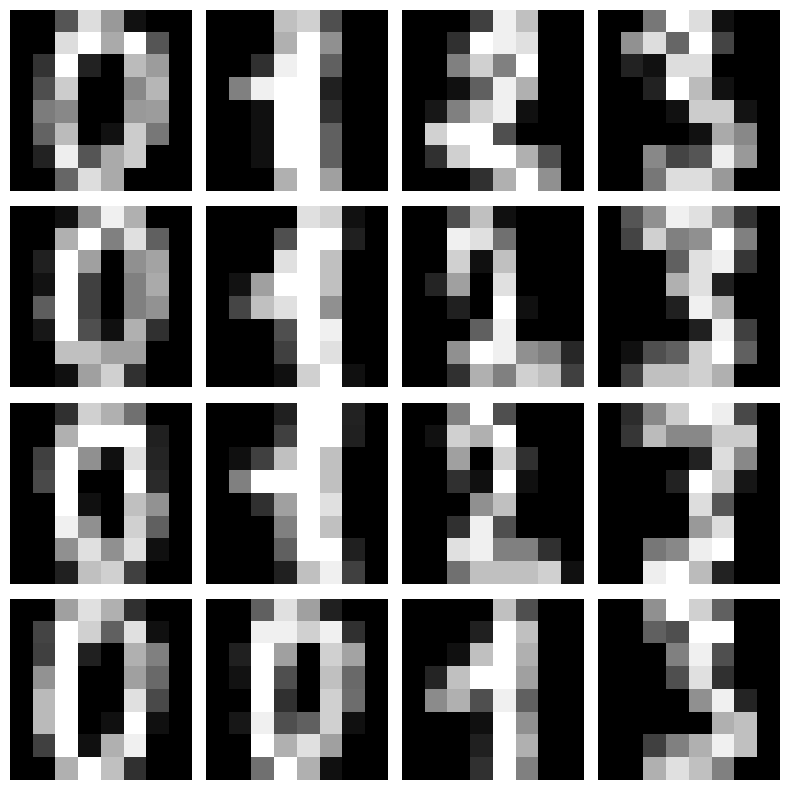

In [43]:
number_of_samples = 4
data = np.random.rand(number_of_samples, 4)  # Example data

# Function to plot the array as 8x8 images
def plot_images(data, samples_to_plot=64):
    # Ensure we don't plot more samples than available
    samples_to_plot = min(samples_to_plot, data.shape[0])
    
    # Calculate the number of rows and columns for the subplots
    nrows = int(np.sqrt(samples_to_plot))
    ncols = int(np.ceil(samples_to_plot / nrows))
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))
    axes = axes.flatten()
    
    for i in range(samples_to_plot):
        image = data[i].reshape((8, 8))
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')
    
    # Hide any remaining axes if the number of samples is not a perfect square
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the images
plot_images(scaled_data, samples_to_plot=16)


In [45]:
selected_target

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0, 1, 3, 1, 0, 0, 2, 2, 2,
       0, 1, 2, 3, 3, 3, 3, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 3, 1, 3, 1, 3,
       1, 0, 3, 1, 2, 2, 2, 0, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0,
       1, 3, 1, 0, 0, 2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 1, 0, 2, 2, 0, 0, 1,
       3, 2, 1, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 2, 2, 0, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 0, 1, 3, 1, 0, 0, 2, 2, 2, 0, 1, 2, 3, 3, 3,
       3, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 2,
       2, 0, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0, 1, 3, 1, 0, 0,
       2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 3, 1,
       3, 1, 3, 1, 0, 3, 1, 2, 2, 2, 0, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 0, 1, 3, 1, 0, 0, 2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 1, 0, 2, 2,
       0, 0, 1, 3, 2, 1, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 2, 2, 0, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0, 1, 3, 1, 0, 0, 2, 2, 2, 0, 1, 2,
       3, 3, 3, 3, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 3,